The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


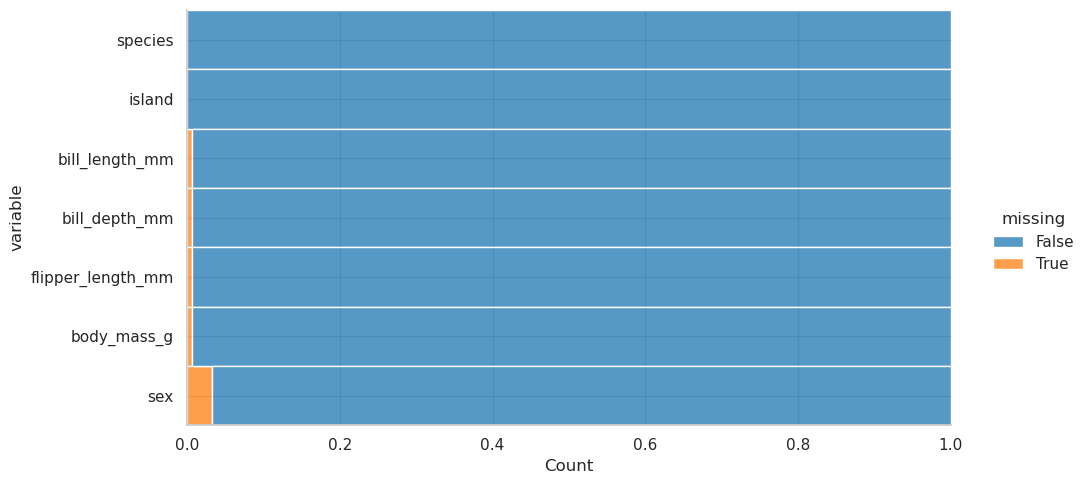

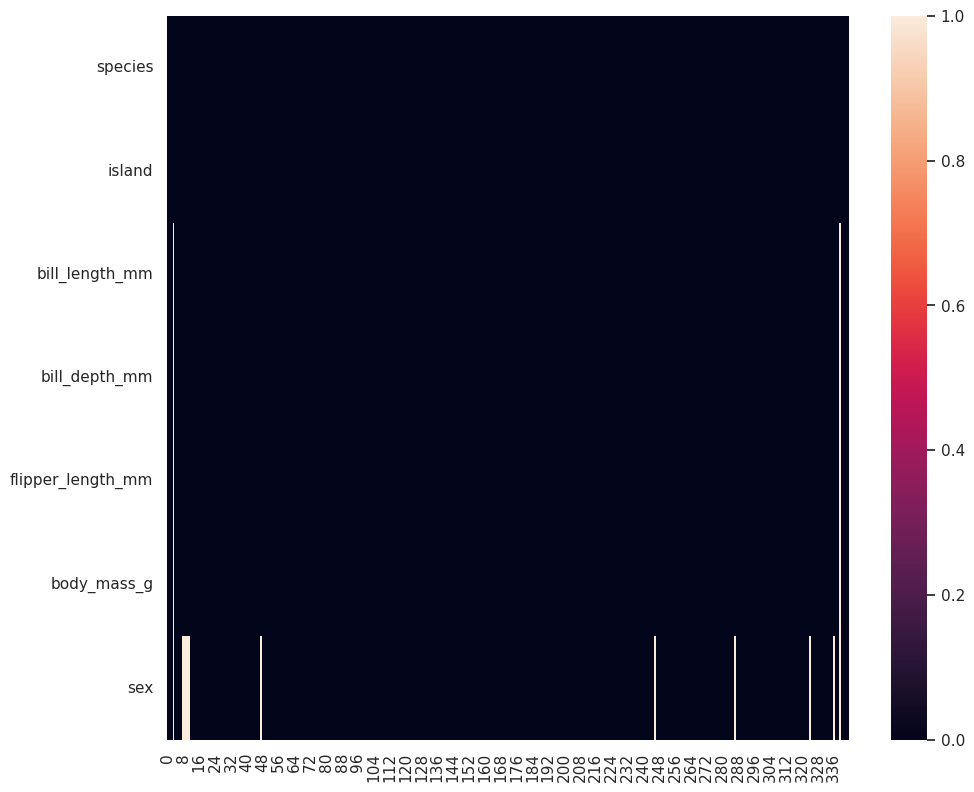

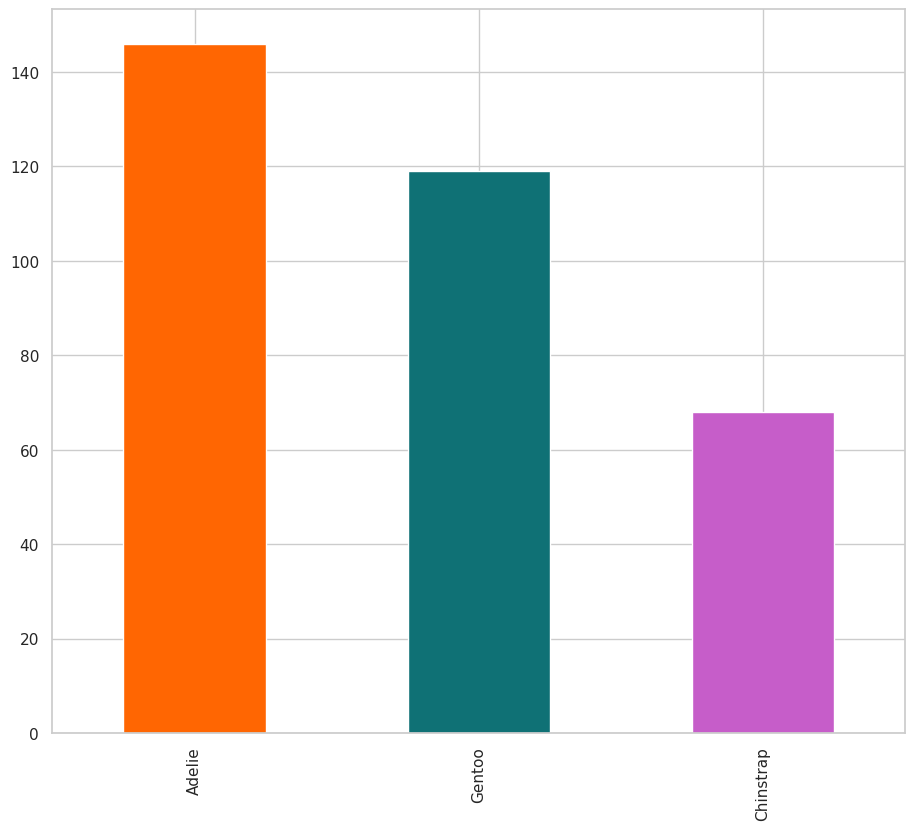

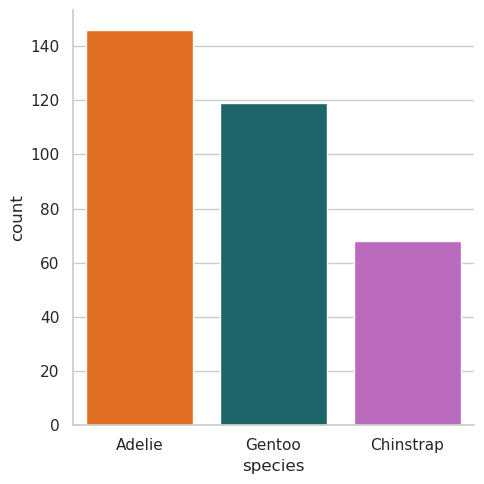

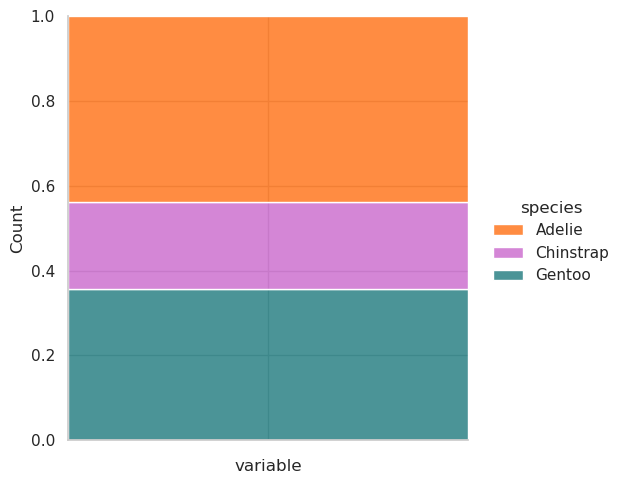

/tmp/ipykernel_39985/1098114682.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()
/tmp/ipykernel_39985/1658957529.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()
/tmp/ipykernel_39985/3242987746.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

In [16]:
%run "0.4-antoniolml-medias-tendencia-central.ipynb"

## **Medidas de dispersión**

### ¿Cuál es el valor máximo de las variables?

In [17]:
processed_penguins_df.max(numeric_only=False)

species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
sex                       Male
dtype: object

## ¿Cuál es el valor mínimo de las variables?


In [18]:
processed_penguins_df.min(numeric_only=False)

species              Adelie
island               Biscoe
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
sex                  Female
dtype: object

## ¿Cuál es el rango de las variables?


In [19]:
processed_penguins_df.max(numeric_only=True)-processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?


In [20]:
processed_penguins_df.std()

/tmp/ipykernel_39985/4261057176.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64

In [21]:
processed_penguins_df.mean()-processed_penguins_df.std()

/tmp/ipykernel_39985/1306273066.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()-processed_penguins_df.std()
/tmp/ipykernel_39985/1306273066.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()-processed_penguins_df.std()


bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
dtype: float64

## ¿Cuál es el rango intercuartílico?


In [22]:
processed_penguins_df.quantile(0.25)

/tmp/ipykernel_39985/2653252021.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.25)


bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
Name: 0.25, dtype: float64

In [23]:
#rango
processed_penguins_df.quantile(0.75)-processed_penguins_df.quantile(0.25)

/tmp/ipykernel_39985/4193154747.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.75)-processed_penguins_df.quantile(0.25)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
dtype: float64

In [24]:
(
    processed_penguins_df
    .quantile(q=[0.75,0.50,0.25])
    .transpose()
    .rename_axis("metric")
    .reset_index()
    .assign(
        iqr=lambda df:df[0.75]-df[0.25]
    )
)

/tmp/ipykernel_39985/671757710.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df


,metric,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0


## ¿Cómo puedo visualizar la distribución de una variable?

**Histograma**


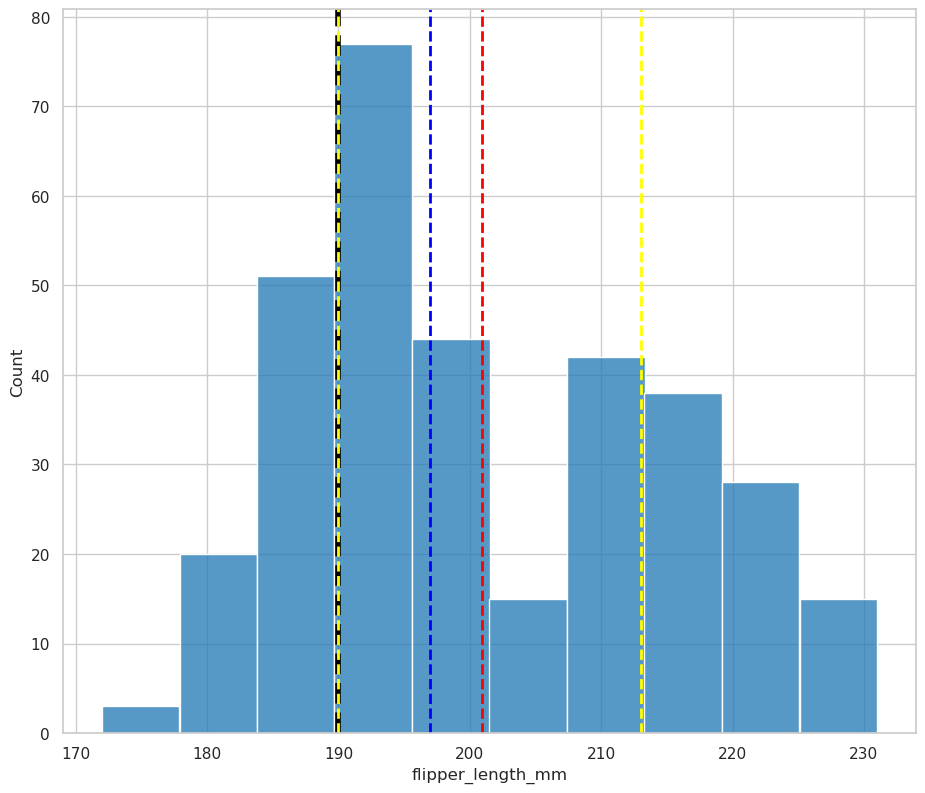

In [25]:
sns.histplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
)


plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color="red",
    linestyle="dashed",
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color="blue",
    linestyle="dashed",
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode().values[0],
    color="black",
    linestyle="dashed",
    linewidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color="yellow",
    linestyle="dashed",
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color="yellow",
    linestyle="dashed",
    linewidth=2
)

## Diagrama de caja / boxplot


<AxesSubplot: xlabel='flipper_length_mm'>

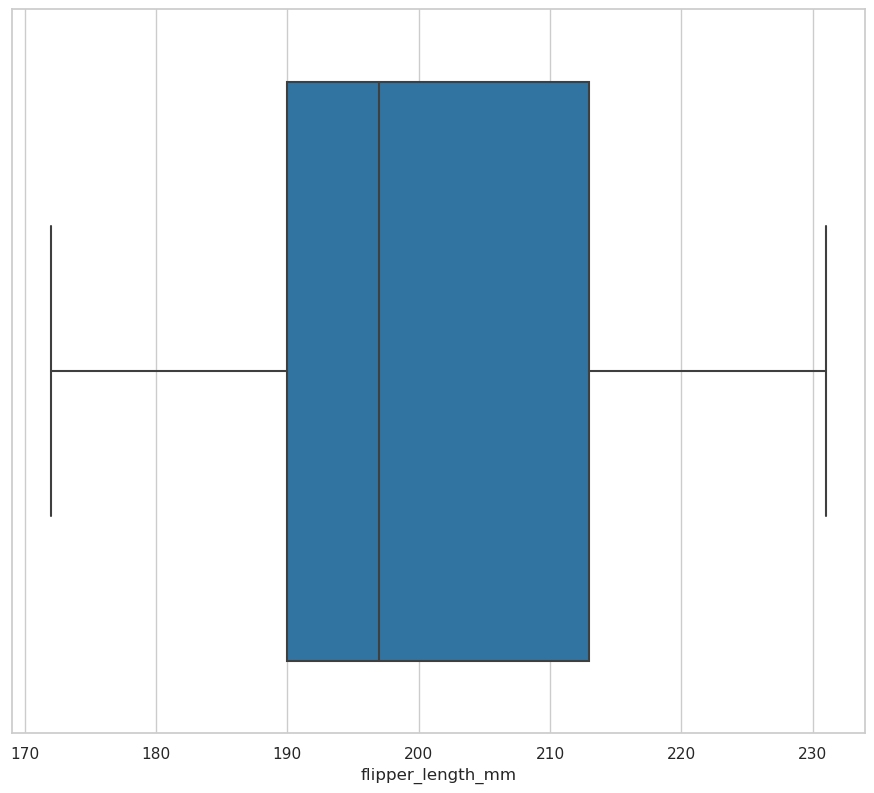

In [26]:
sns.boxplot(
    x=processed_penguins_df.flipper_length_mm,
)

## **Limitaciones**

In [27]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

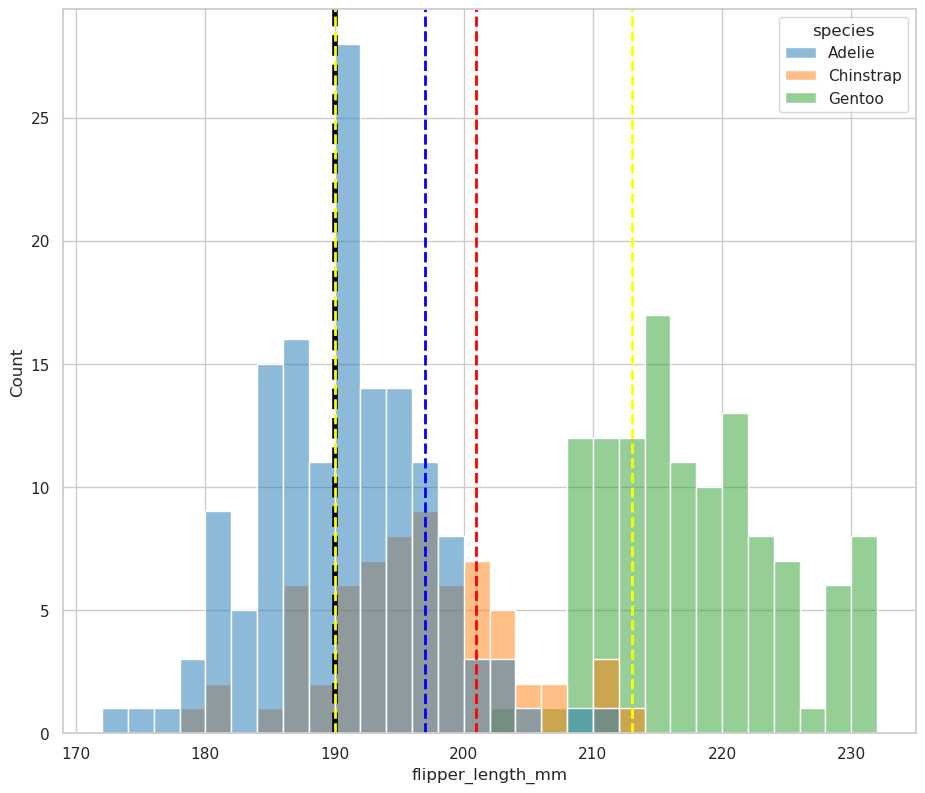

In [28]:
sns.histplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    hue="species",
    binwidth=2
)


plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

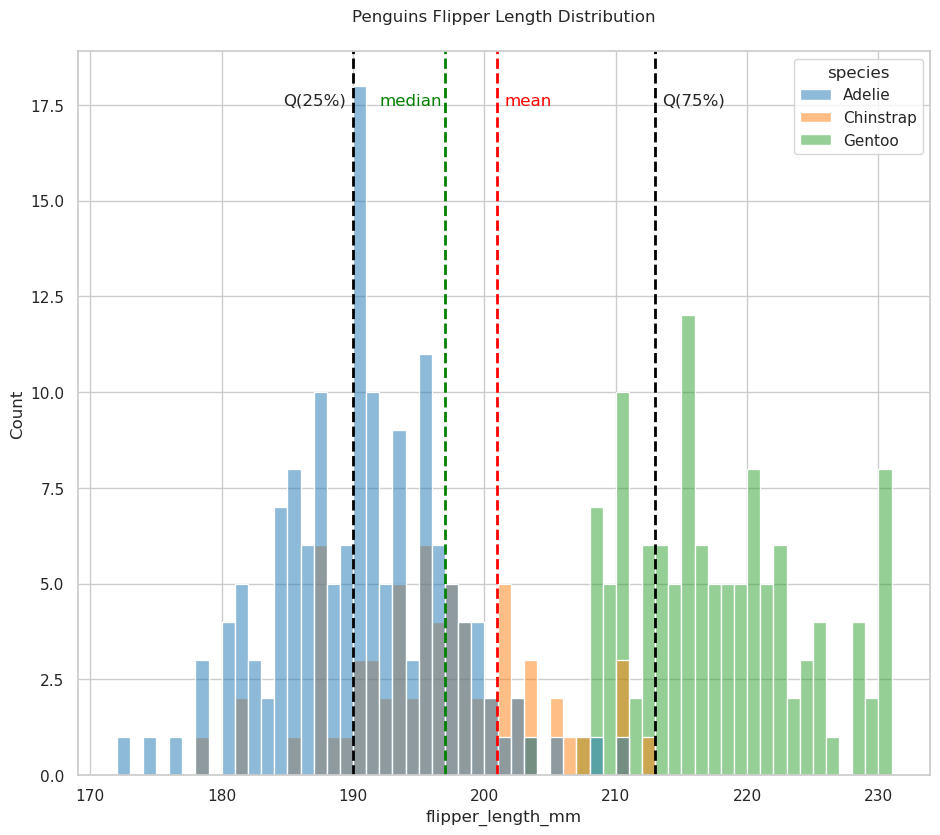

In [29]:
var_flipper_len = processed_penguins_df['flipper_length_mm']

g=sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    hue='species',
    alpha=.5
)
g.set_title('Penguins Flipper Length Distribution', y=1.03)

# Mean(Red)
plt.axvline(
    x =var_flipper_len.mean(),
    linestyle="dashed",
    color="r",
    linewidth=2
)

# Median(Green)
plt.axvline(
    x=var_flipper_len.median(),
    linestyle="dashed",
    color="g",
    linewidth=2
)

# Q_75(Black)
plt.axvline(
    x=var_flipper_len.quantile(0.75),
    linestyle="dashed",
    color="k",
    linewidth=2
)

# Q_25(Black)
plt.axvline(
    x=var_flipper_len.quantile(0.25),
    linestyle="dashed",
    color="k",
    linewidth=2
)

plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(192,17.5, 'median', fontsize=12, color='g')
plt.text(201.5,17.5, 'mean', fontsize=12, color='r')
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)

plt.show()
